In [1]:
import pandas as pd
import numpy as np
import os
print os.getcwd();

C:\Users\henrique\Desktop\Polytechnique\3rd year\Projet 3A


In [2]:
# import libraries for visualization
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# import libraries for agglomerative clustering
from sklearn.cluster import AgglomerativeClustering

## Reading data

In [6]:
df = pd.read_csv('nba-2015-2016-regular-season.csv')

## Building new dataframe with only numerical features

In [7]:
df2 = df.select_dtypes(include=['number'])

## Applying agglomerative clustering method

In [8]:
model = AgglomerativeClustering(linkage='ward', n_clusters=5)
model.fit(df2)
ward_labels = model.labels_

## Applying another agglomerative clustering method

In [9]:
model = AgglomerativeClustering(linkage='average', n_clusters=5)
model.fit(df2)
average_labels = model.labels_

## Applying a third agglomerative clustering method

In [10]:
model = AgglomerativeClustering(linkage='complete', n_clusters=5)
model.fit(df2)
complete_labels = model.labels_

## Applying Kmeans clustering method

In [11]:
from sklearn.cluster import KMeans

In [16]:
estimator = KMeans(n_clusters=5)
estimator.fit(df2)
kmeans_labels = estimator.labels_

## Applying spectral clustering method

In [17]:
from sklearn.cluster import spectral_clustering

In [18]:
sc_labels = spectral_clustering(df2, n_clusters=5, eigen_solver='arpack')

ValueError: array must be 2-dimensional and square. shape = (476, 26)

## Applying PCA

In [10]:
#import libraries from features decomposition
from sklearn import decomposition

In [2]:
pca = decomposition.PCA(n_components=3)
pca.fit(df2)
reduced_df = pca.transform(df2)
pca.explained_variance_ratio_

NameError: name 'decomposition' is not defined

In [12]:
reduced_df

array([[-16.76596746,  -5.01937237,  -4.84078445],
       [-26.21794158,  13.40916092,  -0.17538323],
       [ 51.05455752,   4.89515133, -22.50100609],
       ..., 
       [-35.48679358,  -2.32737274,   2.11004556],
       [-21.37418414,   3.94065597,   5.89866782],
       [-24.14063707,  23.00313551,  22.14150577]])

## Ploting reduced dataset with ward agglomerative clustering labels

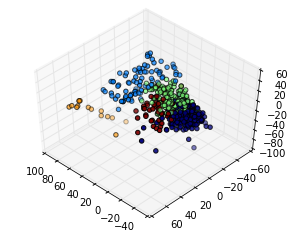

In [27]:
fig = plt.figure(1, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(reduced_df[:, 0], reduced_df[:, 1], reduced_df[:, 2], c=ward_labels)

## Ploting reduced dataset with average agglomerative clustering labels

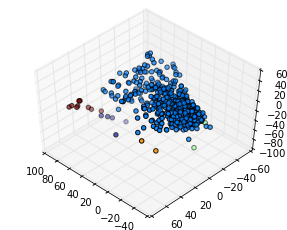

In [38]:
fig = plt.figure(1, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(reduced_df[:, 0], reduced_df[:, 1], reduced_df[:, 2], c=average_labels)

## Ploting reduced dataset with complete agglomerative clustering labels

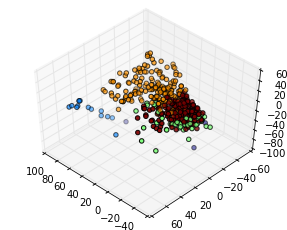

In [39]:
fig = plt.figure(1, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(reduced_df[:, 0], reduced_df[:, 1], reduced_df[:, 2], c=complete_labels)

## Ploting reduced dataset with kmeans clustering labels

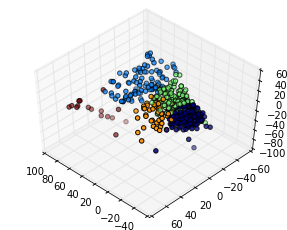

In [26]:
fig = plt.figure(1, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(reduced_df[:, 0], reduced_df[:, 1], reduced_df[:, 2], c=kmeans_labels)